In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 12)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats
from scipy.stats import poisson

# Stats Models
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from IPython.display import display, HTML
import random

In [2]:
# Standard ML Models for comparison
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy
from scipy.stats import pearsonr

In [3]:
#Read the csv file WorldCup2018
WorldCup2018 = pd.read_excel('Worldcup2018_FINAL.xlsx')

In [4]:
#Convert Date from object to date format
WorldCup2018['Date'] = pd.to_datetime(WorldCup2018['Date'])

#Id creation
WorldCup2018['Id'] = range(1, len(WorldCup2018) + 1)

In [5]:
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37456
Data columns (total 71 columns):
Id_Match                       37457 non-null int64
Date                           37457 non-null datetime64[ns]
Home_Team_Confederation        37457 non-null object
Home_Team                      37457 non-null object
Home_Team_Fifa_Code            37457 non-null object
Away_Team_Fifa_Code            37457 non-null object
Away_Team                      37457 non-null object
Away_Team_Confederation        37457 non-null object
Home_Score                     37457 non-null int64
Away_Score                     37457 non-null int64
Country                        37457 non-null object
Neutral                        37457 non-null bool
Goal_Diff                      37457 non-null int64
New_Tournament                 37457 non-null object
Tournament_Weight              37457 non-null float64
Friendly                       37457 non-null bool
Qualification                  37457 non-n

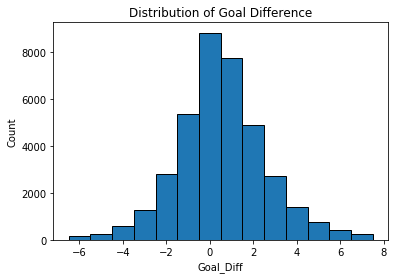

In [6]:
# Histogram of Goal_Diff
plt.bar(WorldCup2018['Goal_Diff'].value_counts().index, 
        WorldCup2018['Goal_Diff'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Goal_Diff'); plt.ylabel('Count'); plt.title('Distribution of Goal Difference');
plt.show()

C:\Users\Delvalle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Delvalle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Delvalle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd

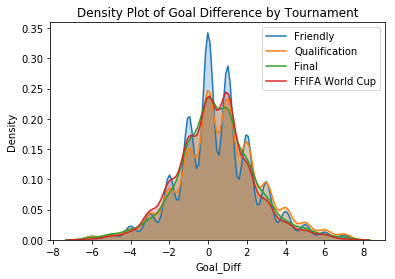

In [7]:
#Density plots of the goal_diff distribution
sns.kdeplot(WorldCup2018.ix[WorldCup2018['New_Tournament'] == 'Friendly', 'Goal_Diff'], label = 'Friendly', shade = True)
sns.kdeplot(WorldCup2018.ix[WorldCup2018['New_Tournament'] == 'Qualification', 'Goal_Diff'], label = 'Qualification', shade = True)
sns.kdeplot(WorldCup2018.ix[WorldCup2018['New_Tournament'] == 'Final', 'Goal_Diff'], label = 'Final', shade = True)
sns.kdeplot(WorldCup2018.ix[WorldCup2018['New_Tournament'] == 'FIFA World Cup', 'Goal_Diff'], label = 'FFIFA World Cup', shade = True)
plt.xlabel('Goal_Diff'); plt.ylabel('Density'); plt.title('Density Plot of Goal Difference by Tournament');
plt.show()

In [8]:
#Feature Selection
#Drop columns (0-rows, 1-columns)
WorldCup2018_Analytics = WorldCup2018.drop('Home_Team_Confederation', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('New_Tournament', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team_Confederation', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Team', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Score', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Score', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('WIN', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('DRAW', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('LOST', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Id_Match', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Country', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Team_Fifa_Code', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team_Fifa_Code', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Outcome', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Date', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Neutral', 1)

In [9]:
#Feature Selection
#Drop columns (0-rows, 1-columns)
#WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team_UEFA', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Team_CONMEBOL', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team_AFC', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team_CONCACAF', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team_CONMEBOL', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team_CAF', 1)
#WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Id', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Team_AFC', 1)
#WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Team_UEFA', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Team_CONCACAF', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Team_CAF', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Away_Team_OFC', 1)
WorldCup2018_Analytics = WorldCup2018_Analytics.drop('Home_Team_OFC', 1)

In [10]:
WorldCup2018_Analytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37456
Data columns (total 44 columns):
Goal_Diff                      37457 non-null int64
Tournament_Weight              37457 non-null float64
Friendly                       37457 non-null bool
Qualification                  37457 non-null bool
Final                          37457 non-null bool
FIFAWorldCup                   37457 non-null bool
Home_Conf_Weight               37457 non-null float64
Away_Conf_Weight               37457 non-null float64
Home                           37457 non-null bool
Away                           37457 non-null bool
Date_Weight                    37457 non-null float64
Home_Team_UEFA                 37457 non-null int64
Away_Team_UEFA                 37457 non-null int64
last5games_w_per_home          37457 non-null float64
last10games_w_per_home         37457 non-null float64
last20games_w_per_home         37457 non-null float64
last5games_l_per_home          37457 non-null float

In [11]:
# Find correlations with Goal_Diff and sort
WorldCup2018_Analytics.corr()['Goal_Diff'].sort_values()

last20games_l_per_away        -0.263102
last10games_l_per_away        -0.229471
last20games_l_per_home        -0.199348
last10games_l_per_home        -0.195719
last5games_l_per_away         -0.188590
last5games_l_per_home         -0.178437
last20games_d_per_away        -0.160183
last20games_opp_cc_per_away   -0.126732
last10games_d_per_away        -0.119882
last10games_opp_cc_per_away   -0.106544
last5games_opp_cc_per_away    -0.088842
last5games_d_per_away         -0.083956
Away                          -0.080430
Away_Conf_Weight              -0.056088
Away_Team_UEFA                -0.046722
Friendly                      -0.033233
FIFAWorldCup                  -0.014223
Id                            -0.011445
Final                         -0.010646
Date_Weight                   -0.009896
Home_Team_UEFA                -0.009647
last5games_d_per_home          0.009925
Home_Conf_Weight               0.010415
last10games_d_per_home         0.017899
Tournament_Weight              0.023586


In [12]:
# Find correlations and sort
WorldCup2018_Analytics.corr().abs()['Goal_Diff'].sort_values(ascending=False)

Goal_Diff                      1.000000
last20games_gd_per_away        0.291842
last10games_gd_per_away        0.280493
last20games_l_per_away         0.263102
last20games_gd_per_home        0.261012
last5games_gd_per_away         0.253739
last10games_gd_per_home        0.242751
last20games_w_per_home         0.233997
last10games_l_per_away         0.229471
last5games_gd_per_home         0.215762
last10games_w_per_home         0.212046
last10games_w_per_away         0.211179
last20games_l_per_home         0.199348
last10games_l_per_home         0.195719
last20games_w_per_away         0.195165
last5games_w_per_away          0.194723
last5games_l_per_away          0.188590
last5games_w_per_home          0.178972
last5games_l_per_home          0.178437
last20games_d_per_away         0.160183
last20games_opp_cc_per_away    0.126732
last10games_d_per_away         0.119882
last10games_opp_cc_per_away    0.106544
last20games_opp_cc_per_home    0.089641
last5games_opp_cc_per_away     0.088842


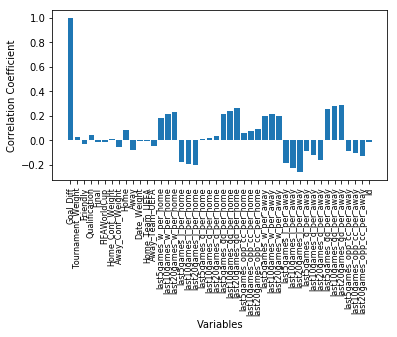

In [13]:
#Bar graph
# Create data
height = WorldCup2018_Analytics.corr()['Goal_Diff'].values
bars = WorldCup2018_Analytics.corr()['Goal_Diff'].index
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90, fontsize='8')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99, hspace = 0.2, wspace = 0.2)
 
# Show graphic
plt.show()

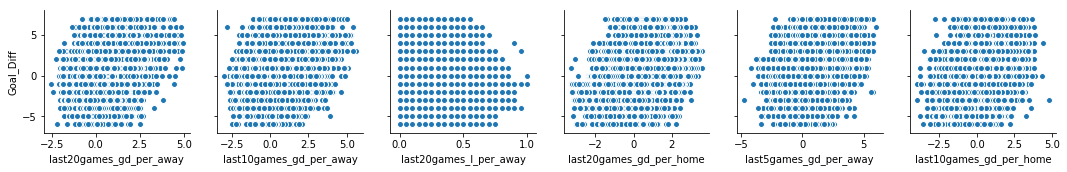

In [14]:
#Graphs of target variable vs explanatory variables
pp = sns.pairplot(data=WorldCup2018_Analytics,
                  y_vars=['Goal_Diff'],
                  x_vars=['last20games_gd_per_away','last10games_gd_per_away', 
                          'last20games_l_per_away', 'last20games_gd_per_home', 
                          'last5games_gd_per_away', 'last10games_gd_per_home'])

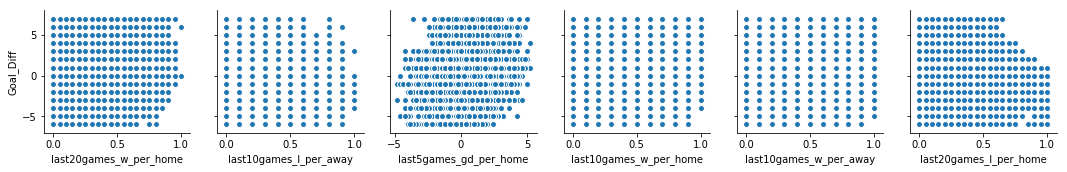

In [15]:
#Graphs of target variable vs explanatory variables
pp = sns.pairplot(data=WorldCup2018_Analytics,
                  y_vars=['Goal_Diff'],
                  x_vars=['last20games_w_per_home', 'last10games_l_per_away', 
                          'last5games_gd_per_home', 'last10games_w_per_home', 
                          'last10games_w_per_away', 'last20games_l_per_home'])

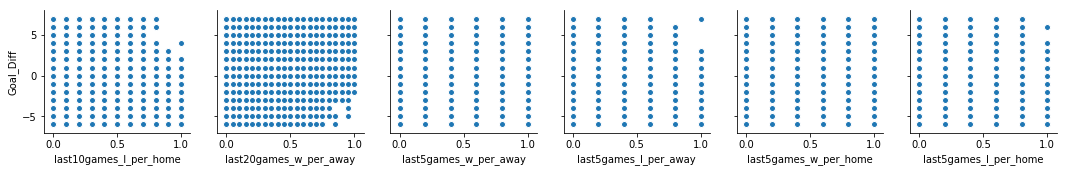

In [16]:
#Graphs of target variable vs explanatory variables
pp = sns.pairplot(data=WorldCup2018_Analytics,
                  y_vars=['Goal_Diff'],
                  x_vars=['last10games_l_per_home', 'last20games_w_per_away', 
                          'last5games_w_per_away', 'last5games_l_per_away',
                          'last5games_w_per_home','last5games_l_per_home' ])

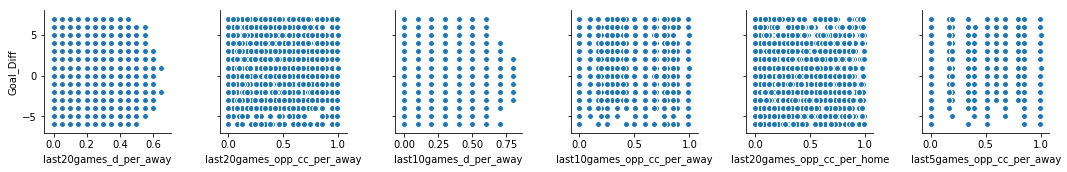

In [17]:
#Graphs of target variable vs explanatory variables
pp = sns.pairplot(data=WorldCup2018_Analytics,
                  y_vars=['Goal_Diff'],
                  x_vars=['last20games_d_per_away','last20games_opp_cc_per_away',
                          'last10games_d_per_away', 'last10games_opp_cc_per_away',
                          'last20games_opp_cc_per_home','last5games_opp_cc_per_away'])

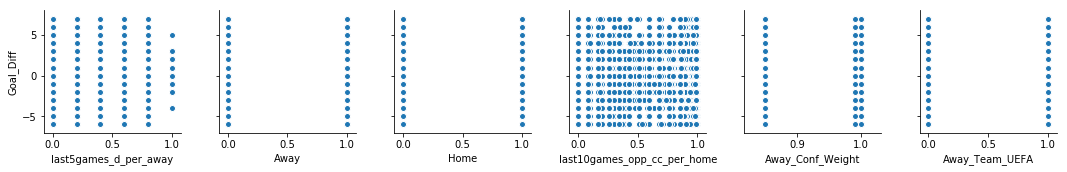

In [18]:
#Graphs of target variable vs explanatory variables
pp = sns.pairplot(data=WorldCup2018_Analytics,
                  y_vars=['Goal_Diff'],
                  x_vars=[ 'last5games_d_per_away', 'Away', 
                          'Home', 'last10games_opp_cc_per_home',
                          'Away_Conf_Weight', 'Away_Team_UEFA'])

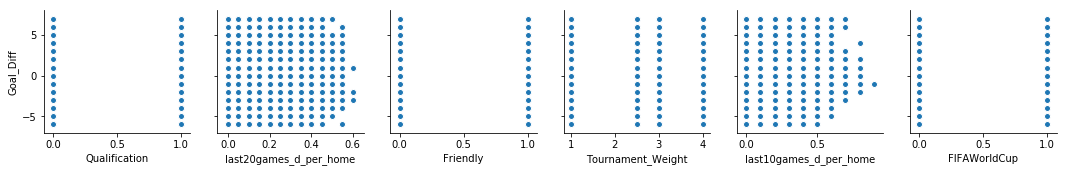

In [19]:
#Graphs of target variable vs explanatory variables
pp = sns.pairplot(data=WorldCup2018_Analytics,
                  y_vars=['Goal_Diff'],
                  x_vars=[ 'Qualification', 'last20games_d_per_home', 
                          'Friendly', 'Tournament_Weight',
                          'last10games_d_per_home', 'FIFAWorldCup'])

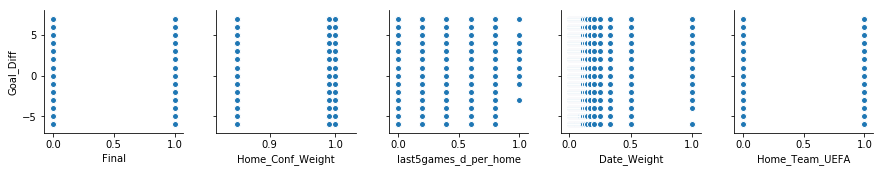

In [20]:
#Graphs of target variable vs explanatory variables
pp = sns.pairplot(data=WorldCup2018_Analytics,
                  y_vars=['Goal_Diff'],
                  x_vars=[ 'Final', 'Home_Conf_Weight', 
                          'last5games_d_per_home', 'Date_Weight',
                          'Home_Team_UEFA'])

In [21]:
#Create training and testing by date
X_train = WorldCup2018_Analytics.loc[WorldCup2018_Analytics['Id'] < 34661].reset_index()

In [22]:
y_train = X_train['Goal_Diff']

In [23]:
X_train = X_train.drop('Id', 1)
X_train = X_train.drop('index', 1)

In [24]:
X_test = WorldCup2018_Analytics.loc[WorldCup2018['Id'] > 34660].reset_index()

In [25]:
y_test = X_test['Goal_Diff']

In [26]:
X_test = X_test.drop('Id', 1)
X_test = X_test.drop('index', 1)

In [27]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(34660, 43) (34660,)
(2797, 43) (2797,)


In [28]:
#Export X_train, y_train, X_test, y_test
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

In [29]:
#Metrics
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [30]:
#Naive Baseline
# Naive baseline is the median
median_pred = X_train['Goal_Diff'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Goal_Diff']

In [31]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 1.5045
Median Baseline RMSE: 2.0677


In [44]:
#Standard Machine Learning Models

# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVR',
                       'Gradient Boosted','Ridge', 'Lasso', 'Neural Network', 'Baseline']
    X_train = X_train.drop(columns='Goal_Diff')
    X_test = X_test.drop(columns='Goal_Diff')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=0.00003, l1_ratio=0.5, max_iter=1e6)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=80)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=100, criterion='mse')
    model7 = Ridge(alpha=0.2,normalize=False, max_iter=1e5)
    model8 = Lasso(alpha=1e-4,normalize=False, max_iter=1e5)
    model9 = MLPRegressor(activation='relu', alpha=3e-05, batch_size='auto', beta_1=0.9, beta_2=0.999, 
                          early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(10,), learning_rate='adaptive', 
                          learning_rate_init=0.1, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5, 
                          random_state=None, shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1, 
                          verbose=False, warm_start=False) 

  
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7, model8, model9]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [45]:
import time
start = time.time()

results = evaluate(X_train, X_test, y_train, y_test)

end = time.time()
print(end - start)

C:\Users\Delvalle\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Delvalle\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Delvalle\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


629.3679478168488


C:\Users\Delvalle\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


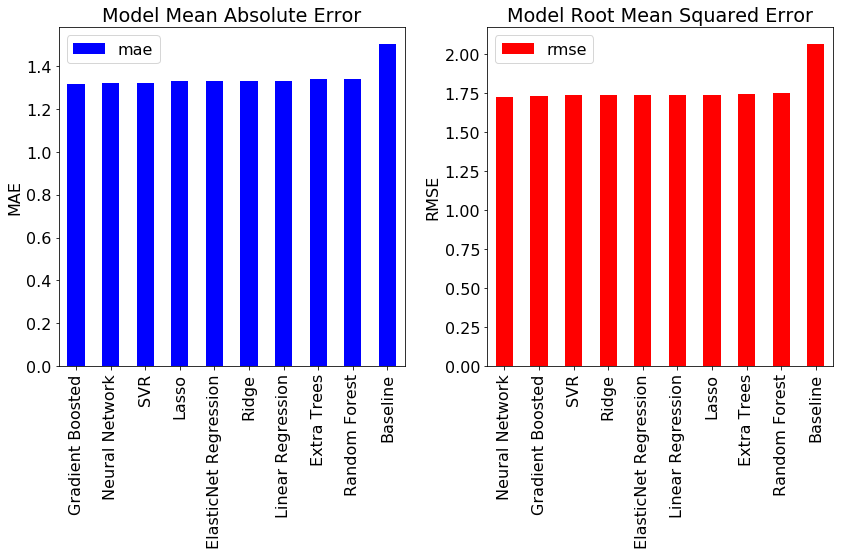

In [46]:
#Visual Comparison of Models
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [47]:
results.sort_values('mae',ascending=True)

,mae,rmse
Gradient Boosted,1.31574,1.73007
Neural Network,1.31906,1.72586
SVR,1.32069,1.73885
Lasso,1.32766,1.7403
ElasticNet Regression,1.32853,1.7399
Ridge,1.32891,1.73964
Linear Regression,1.32943,1.74007
Extra Trees,1.33948,1.74631
Random Forest,1.33982,1.75051
Baseline,1.50447,2.06768


In [48]:
print('Neural Network is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Neural Network', 'rmse'] - results.loc['Baseline', 'rmse'])) / results.loc['Baseline', 'rmse']))

Neural Network is 16.53% better than the baseline.


In [49]:
print('Neural Network is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Neural Network', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

Neural Network is 12.32% better than the baseline.
